# Read MNIST Dataset
https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [1]:
pip install numpy pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        
        # Create NumPy array directly for images
        images = np.zeros((size, rows, cols), dtype=np.uint8)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols], dtype=np.uint8)
            images[i] = img.reshape(rows, cols)
        
        # Convert labels to NumPy array as well
        labels = np.array(labels, dtype=np.uint8)
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

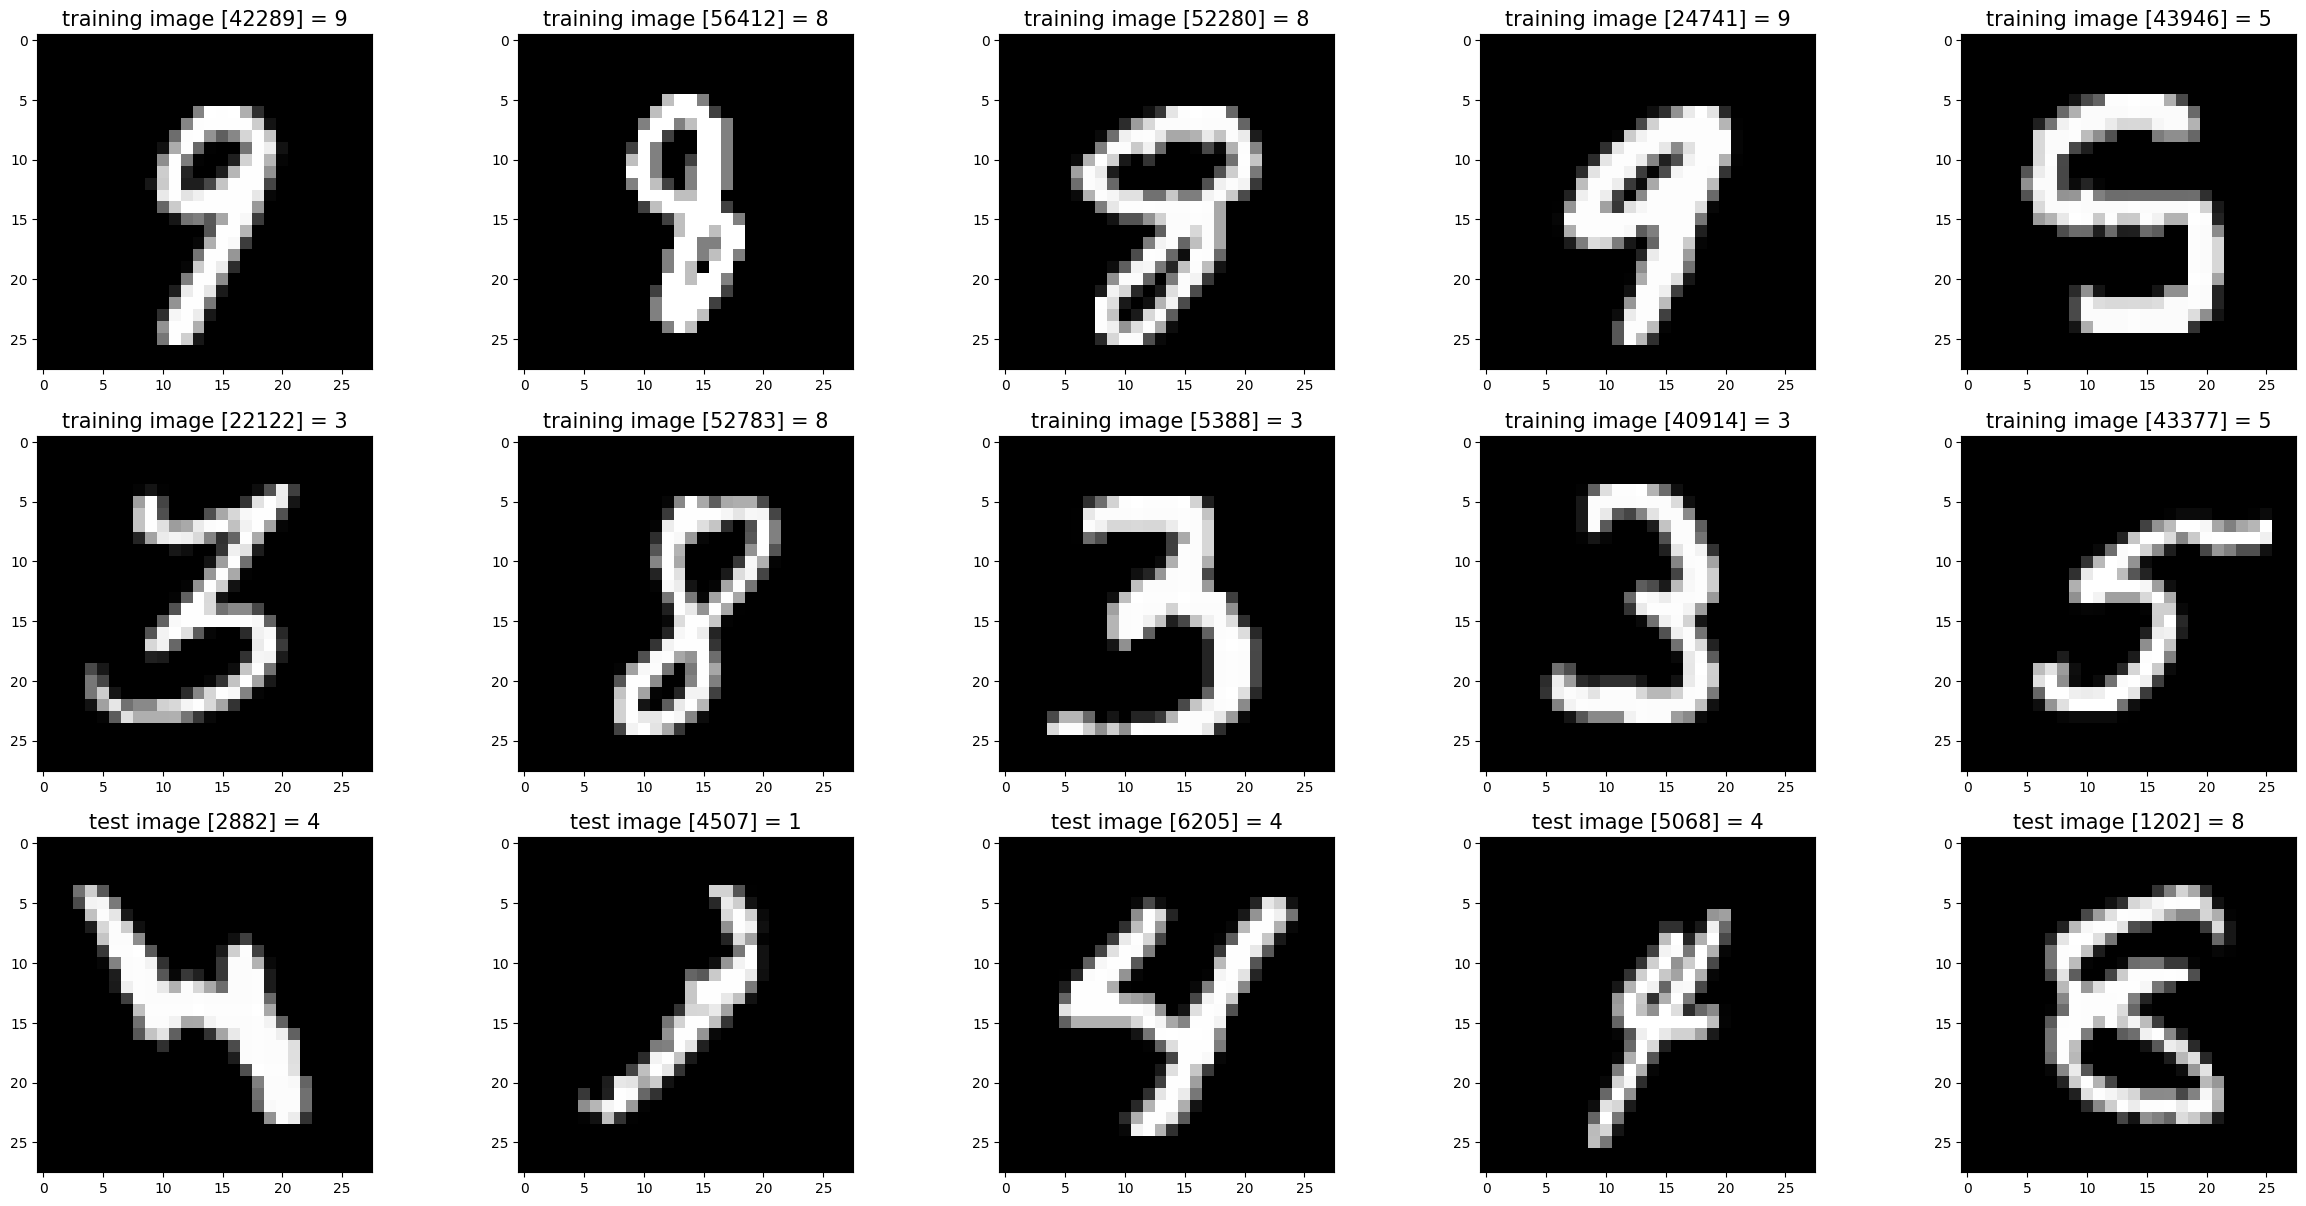

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
import random
import matplotlib.pyplot as plt

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
# Set correct file paths for MNIST dataset
training_images_filepath = 'input/train-images.idx3-ubyte'
training_labels_filepath = 'input/train-labels.idx1-ubyte'
test_images_filepath = 'input/t10k-images.idx3-ubyte'
test_labels_filepath = 'input/t10k-labels.idx1-ubyte'

# Load MNIST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [4]:
import pandas as pd
import numpy as np

def save_mnist_to_csv(images, labels, filename):
    """
    Saves MNIST images and labels to a CSV file.
    Each CSV row contains the 784 pixels followed by the label.
    Optimal format for neural network training.
    """
    print(f"Preparing data for {filename}...")
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    
    # Reshape from (n, 28, 28) to (n, 784) for neural networks
    flat_images = images.reshape(images.shape[0], -1)
    
    # Create DataFrame with pixels as columns
    print("Creating DataFrame...")
    df = pd.DataFrame(flat_images)
    
    # Add labels as the last column
    df['label'] = labels
    
    # Save to CSV
    print(f"Saving to {filename}...")
    df.to_csv(filename, index=False)
    
    print(f"✅ File {filename} saved successfully!")
    print(f"📊 Data: {flat_images.shape[0]} samples × {flat_images.shape[1]} pixels + 1 label")
    print(f"📁 File size: ~{df.memory_usage(deep=True).sum() / (1024*1024):.1f} MB")
    print()

# COMPLETE DATASET SAVE FOR NEURAL NETWORK TRAINING
print("🚀 Generating complete MNIST dataset for neural network")
print("=" * 60)

# Complete training dataset (60,000 samples)
save_mnist_to_csv(x_train, y_train, 'mnist_train_full.csv')

# Complete test dataset (10,000 samples)  
save_mnist_to_csv(x_test, y_test, 'mnist_test_full.csv')

print("🎯 MNIST dataset ready for training!")
print("Files created:")
print("- mnist_train_full.csv : 60,000 training samples")
print("- mnist_test_full.csv : 10,000 test samples")
print("Format: 784 columns (pixels) + 1 column (label)")

🚀 Generating complete MNIST dataset for neural network
Preparing data for mnist_train_full.csv...
Images shape: (60000, 28, 28)
Labels shape: (60000,)
Creating DataFrame...
Saving to mnist_train_full.csv...
✅ File mnist_train_full.csv saved successfully!
📊 Data: 60000 samples × 784 pixels + 1 label
📁 File size: ~44.9 MB

Preparing data for mnist_test_full.csv...
Images shape: (10000, 28, 28)
Labels shape: (10000,)
Creating DataFrame...
Saving to mnist_test_full.csv...
✅ File mnist_train_full.csv saved successfully!
📊 Data: 60000 samples × 784 pixels + 1 label
📁 File size: ~44.9 MB

Preparing data for mnist_test_full.csv...
Images shape: (10000, 28, 28)
Labels shape: (10000,)
Creating DataFrame...
Saving to mnist_test_full.csv...
✅ File mnist_test_full.csv saved successfully!
📊 Data: 10000 samples × 784 pixels + 1 label
📁 File size: ~7.5 MB

🎯 MNIST dataset ready for training!
Files created:
- mnist_train_full.csv : 60,000 training samples
- mnist_test_full.csv : 10,000 test samples
For

In [5]:
# Uncomment the lines below to save the complete dataset
# WARNING: This may take time and create large files!

print("Saving complete training set (60000 samples)...")
save_mnist_to_csv(x_train, y_train, 'mnist_train_full.csv')
print()
print("Saving complete test set (10000 samples)...")  
save_mnist_to_csv(x_test, y_test, 'mnist_test_full.csv')

print("To save the complete dataset, uncomment the lines above.")
print("Files already created: mnist_train_sample.csv (1000 samples) and mnist_test_sample.csv (100 samples)")

# Final verification of array properties
print(f"\nData properties:")
print(f"x_train: {x_train.shape}, dtype: {x_train.dtype}, min: {x_train.min()}, max: {x_train.max()}")
print(f"y_train: {y_train.shape}, dtype: {y_train.dtype}, unique values: {np.unique(y_train)}")
print(f"x_test: {x_test.shape}, dtype: {x_test.dtype}")
print(f"y_test: {y_test.shape}, dtype: {y_test.dtype}")

Saving complete training set (60000 samples)...
Preparing data for mnist_train_full.csv...
Images shape: (60000, 28, 28)
Labels shape: (60000,)
Creating DataFrame...
Saving to mnist_train_full.csv...
✅ File mnist_train_full.csv saved successfully!
📊 Data: 60000 samples × 784 pixels + 1 label
📁 File size: ~44.9 MB


Saving complete test set (10000 samples)...
Preparing data for mnist_test_full.csv...
Images shape: (10000, 28, 28)
Labels shape: (10000,)
Creating DataFrame...
Saving to mnist_test_full.csv...
✅ File mnist_train_full.csv saved successfully!
📊 Data: 60000 samples × 784 pixels + 1 label
📁 File size: ~44.9 MB


Saving complete test set (10000 samples)...
Preparing data for mnist_test_full.csv...
Images shape: (10000, 28, 28)
Labels shape: (10000,)
Creating DataFrame...
Saving to mnist_test_full.csv...
✅ File mnist_test_full.csv saved successfully!
📊 Data: 10000 samples × 784 pixels + 1 label
📁 File size: ~7.5 MB

To save the complete dataset, uncomment the lines above.
Files a